# Класифікація відгуків на позитивні та негативні

Цей ноутбук демонструє класифікацію відгуків на позитивні та негативні категорії за допомогою методів Bag-of-Words (BOW) та TF-IDF для виділення ознак.

In [18]:

import re
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Функція для видалення HTML тегів
def remove_html_tags(text):
    clean = re.sub(r'<.*?>', '', text)  # Видаляємо все, що між < і >
    return clean

# Завантаження датасету
data = pd.read_csv('imdb-dataset.csv')
X = data['review'].apply(remove_html_tags) # відгук
y = data['sentiment'].apply(remove_html_tags) # ставлення

# Розділення датасету на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизація методом Bag-of-Words (BOW)
bow_vectorizer = CountVectorizer(stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Векторизація методом TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Навчання класифікатора Наївного Баєса на основі BOW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_bow = nb_bow.predict(X_test_bow)
bow_accuracy = accuracy_score(y_test, y_pred_bow)

# Навчання класифікатора Наївного Баєса на основі TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
tfidf_accuracy = accuracy_score(y_test, y_pred_tfidf)


## Результати

In [20]:
# Виведення результатів для Bag-of-Words
print("Результати для моделі Bag-of-Words:")
print(f"Точність моделі: {bow_accuracy*100:.2f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_bow))

# Виведення результатів для TF-IDF
print("\nРезультати для моделі TF-IDF:")
print(f"Точність моделі: {tfidf_accuracy*100:.2f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_tfidf))

Результати для моделі Bag-of-Words:
Точність моделі: 85.61
Звіт класифікації:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Результати для моделі TF-IDF:
Точність моделі: 86.52
Звіт класифікації:
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Висновки 

Bag-of-Words (BOW):
Модель класифікації на основі Bag-of-Words досягла точності 85.61%. Звіт показує, що точність для негативних відгуків становить 84%, а для позитивних — 87%, з аналогічними значеннями метрик recall і f1-score. Загалом модель продемонструвала збалансовану роботу, але може втратити точність для текстів, де семантика відіграє важливу роль.

Висновки по моделі TF-IDF:
Модель TF-IDF показала трохи кращий результат із точністю 86.52%. Для негативних відгуків точність становить 86%, а для позитивних — 88%, що свідчить про її здатність враховувати важливість ключових слів у текстах. Ця модель виявилася ефективнішою для складних текстів, де ключовими є відмінності між частотами слів.

# Графік найпоширеніших слів для позитивних і негативних відгуків

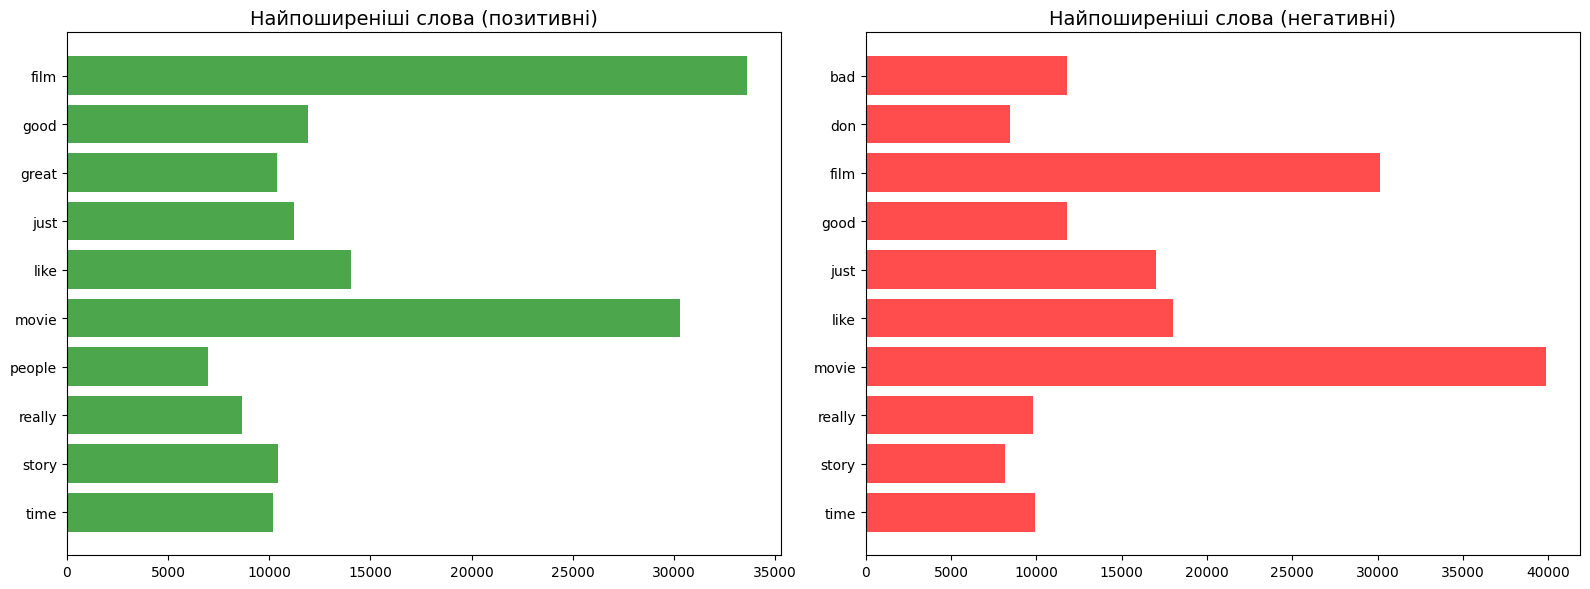

In [ ]:
# Об'єднання текстів за категоріями
positive_text = " ".join(X_train[y_train == 'positive'])
negative_text = " ".join(X_train[y_train == 'negative'])

# Підрахунок частоти слів
positive_vectorizer = CountVectorizer(stop_words='english', max_features=10)
negative_vectorizer = CountVectorizer(stop_words='english', max_features=10)
positive_word_counts = positive_vectorizer.fit_transform([positive_text]).toarray()[0]
negative_word_counts = negative_vectorizer.fit_transform([negative_text]).toarray()[0]

positive_words = positive_vectorizer.get_feature_names_out()
negative_words = negative_vectorizer.get_feature_names_out()

# Побудова графіків частоти слів
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].barh(positive_words, positive_word_counts, color='green', alpha=0.7)
ax[0].set_title('Найпоширеніші слова (позитивні)', fontsize=14)
ax[0].invert_yaxis()

ax[1].barh(negative_words, negative_word_counts, color='red', alpha=0.7)
ax[1].set_title('Найпоширеніші слова (негативні)', fontsize=14)
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()